In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# ML Pkgs
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.metrics import accuracy_score,hamming_loss,classification_report
### Split Dataset into Train and Text
from sklearn.model_selection import train_test_split
# Feature engineering
from sklearn.feature_extraction.text import TfidfVectorizer
# Multi Label Pkgs
from skmultilearn.problem_transform import BinaryRelevance
from skmultilearn.problem_transform import ClassifierChain
from skmultilearn.problem_transform import LabelPowerset
from skmultilearn.adapt import MLkNN
import neattext as nt
import neattext.functions as nfx
import skmultilearn
import joblib

In [4]:
!pip install seaborn
# !pip install scikit-multilearn

     |████████████████████████████████| 216 kB 587 kB/s eta 0:00:01
You should consider upgrading via the '/opt/anaconda3/envs/mlgdl/bin/python -m pip install --upgrade pip' command.


In [6]:
df=pd.read_csv('so_dataset_2_tags.csv')
df.head()

,title,tags,mysql,python,php
0,Flask-SQLAlchemy - When are the tables/databas...,"['python', 'mysql']",1,1.0,0.0
1,Combining two PHP variables for MySQL query,"['php', 'mysql']",1,0.0,1.0
2,'Counting' the number of records that match a ...,"['php', 'mysql']",1,0.0,1.0
3,Insert new row in a table and auto id number. ...,"['php', 'mysql']",1,0.0,1.0
4,Create Multiple MySQL tables using PHP,"['php', 'mysql']",1,0.0,1.0


In [7]:
df.loc[1].title

'Combining two PHP variables for MySQL query'

In [8]:
df.dtypes

title      object
tags       object
mysql       int64
python    float64
php       float64
dtype: object

In [9]:
df['mysql'] = df['mysql'].astype(float)
df.dtypes

title      object
tags       object
mysql     float64
python    float64
php       float64
dtype: object

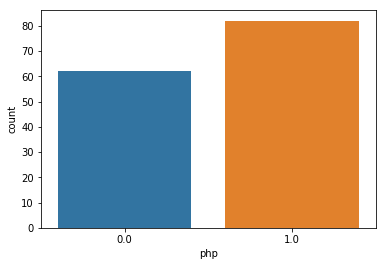

In [12]:
# Value Count 
sns.countplot(df['php'])

In [11]:
df['php'].value_counts()

1.0    82
0.0    62
Name: php, dtype: int64

In [14]:
!pip install neattext

     |████████████████████████████████| 85 kB 619 kB/s eta 0:00:011
You should consider upgrading via the '/opt/anaconda3/envs/mlgdl/bin/python -m pip install --upgrade pip' command.


In [16]:
# Explore For Noise
df['title'].apply(lambda x:nt.TextFrame(x).noise_scan())

0      {'text_noise': 11.267605633802818, 'noise_coun...
1      {'text_noise': 4.651162790697675, 'noise_count...
2      {'text_noise': 9.90990990990991, 'noise_count'...
3      {'text_noise': 8.47457627118644, 'noise_count'...
4      {'text_noise': 2.631578947368421, 'noise_count...
                             ...                        
139    {'text_noise': 26.41509433962264, 'noise_count...
140    {'text_noise': 3.8461538461538463, 'noise_coun...
141    {'text_noise': 6.666666666666667, 'noise_count...
142    {'text_noise': 13.636363636363635, 'noise_coun...
143    {'text_noise': 7.142857142857142, 'noise_count...
Name: title, Length: 144, dtype: object

In [17]:
#  Explore For Noise
df['title'].apply(lambda x:nt.TextExtractor(x).extract_stopwords())

0                                [when, are, the, and]
1                                           [two, for]
2                    [the, of, that, a, and, the, and]
3                                    [in, a, and, and]
4                                              [using]
                            ...                       
139                                 [where, in, using]
140                                               [to]
141                                  [and, get, using]
142    [how, to, the, of, a, with, a, back, into, the]
143                                           [in, if]
Name: title, Length: 144, dtype: object

In [18]:
# Explore For Noise
df['title'].apply(nfx.remove_stopwords)

0      Flask-SQLAlchemy - tables/databases created de...
1                    Combining PHP variables MySQL query
2      'Counting' number records match certain criter...
3         Insert new row table auto id number. Php MySQL
4                       Create Multiple MySQL tables PHP
                             ...                        
139               Executing "SELECT ... ... ..." MySQLdb
140                              SQLAlchemy reconnect db
141                      mysql Count Distinct result php
142    store result radio button database value, data...
143                 Use SQL count result statement - PHP
Name: title, Length: 144, dtype: object

In [19]:
corpus = df['title'].apply(nfx.remove_stopwords)

In [20]:
tfidf = TfidfVectorizer()

In [21]:
Xfeatures = tfidf.fit_transform(corpus).toarray()

In [23]:
y = df[['mysql', 'python', 'php']]

In [24]:
# Split Data 
X_train,X_test,y_train,y_test = train_test_split(Xfeatures,y,test_size=0.3,random_state=42)

In [25]:

print(df['title'].shape)
print(X_train.shape)

(144,)
(100, 404)


In [28]:
# binary classficiation
binary_rel_clf = BinaryRelevance(MultinomialNB())

In [29]:
binary_rel_clf.fit(X_train,y_train)

BinaryRelevance(classifier=MultinomialNB(alpha=1.0, class_prior=None,
                                         fit_prior=True),
                require_dense=[True, True])

In [30]:
# Predictions
br_prediction = binary_rel_clf.predict(X_test)

In [31]:
# Convert to Array  To See Result
br_prediction.toarray()

array([[1., 0., 1.],
       [1., 0., 1.],
       [1., 1., 0.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 1., 0.],
       [1., 1., 0.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 1., 0.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 1., 0.],
       [1., 1., 0.],
       [1., 1., 0.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 1., 0.],
       [1., 1., 0.],
       [1., 1., 0.],
       [1., 0., 1.],
       [1., 1., 0.],
       [1., 1., 0.],
       [1., 1., 0.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 1., 0.],
       [1., 0., 1.],
       [1., 1., 0.],
       [1., 0., 1.],
       [1., 1., 0.],
       [1., 1., 0.]])

In [32]:
# Accuracy
accuracy_score(y_test,br_prediction)

0.9090909090909091

In [33]:
# Hamming Loss :Incorrect Predictions
# The Lower the result the better
hamming_loss(y_test,br_prediction)

0.06060606060606061

In [34]:
def build_model(model,mlb_estimator,xtrain,ytrain,xtest,ytest):
    # Create an Instance
    clf = mlb_estimator(model)
    clf.fit(xtrain,ytrain)
    # Predict
    clf_predictions = clf.predict(xtest)
    # Check For Accuracy
    acc = accuracy_score(ytest,clf_predictions)
    ham = hamming_loss(ytest,clf_predictions)
    result = {"accuracy:":acc,"hamming_score":ham}
    return result

In [35]:
clf_chain_model = build_model(MultinomialNB(),ClassifierChain,X_train,y_train,X_test,y_test)

In [36]:
clf_chain_model

{'accuracy:': 0.8409090909090909, 'hamming_score': 0.10606060606060606}

In [37]:
clf_labelP_model = build_model(MultinomialNB(),LabelPowerset,X_train,y_train,X_test,y_test)


In [38]:
clf_labelP_model


{'accuracy:': 0.9090909090909091, 'hamming_score': 0.06060606060606061}

In [39]:
### Apply On A Simple Ttitle/Question
ex1 = df['title'].iloc[0]


In [40]:
# Vectorized 
vec_example = tfidf.transform([ex1])

In [41]:
# Make our prediction
binary_rel_clf.predict(vec_example).toarray()

array([[1., 1., 0.]])

In [43]:
binary_rel_clf_file = open("binary_rel_clf_model_file.pkl","wb")
joblib.dump(binary_rel_clf,binary_rel_clf_file)
binary_rel_clf_file.close()

In [44]:
tfidf_vectorizer_file = open("tfidf_vectorizer_SO_tags_file.pkl","wb")
joblib.dump(tfidf,tfidf_vectorizer_file)
tfidf_vectorizer_file.close()